In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn import metrics

data = pd.read_csv('DATA/pima.txt',delimiter="	")
columns = ['pregnant','glucose','diastolic','triceps','insulin','bmi','diabetes','age','test']
# print(data)

## Perform simple graphical and numerical summaries of the data.

Can you find any obvious irregularities in the data? If you do, take appropriate steps to correct the problems.

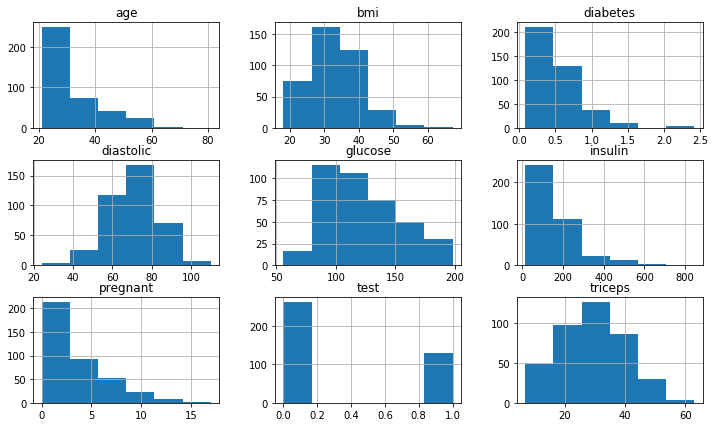

In [19]:
import numpy as np
bins = 1 + np.log(len(data))
# histogram of the whole data
hist = data.hist(bins = int(bins), figsize=(12,7))
plt.show()

Clearly BMI index and diastolic blood pressure cannot have 0 values, so we will remove such values. 


In [4]:
non_zero_columns = ['glucose','diastolic','triceps','bmi','diabetes','age', 'insulin']
# # subst zero values for the mean values
# for column in non_zero_columns:
#     median = data[column].median()
# # Substitute it in the BMI column of the
# # dataset where values are 0
#     data[column] = data[column].replace(
#     to_replace=0, value=median)

data = data.drop(data[data['glucose'] == 0].index)
data = data.drop(data[data['triceps'] == 0].index) # even it will be deleted xD
data = data.drop(data[data['diastolic'] == 0].index) #same
data = data.drop(data[data['insulin'] == 0].index)
data = data.drop(data[data['bmi'] == 0].index)
data = data.drop(data[data['diabetes'] == 0].index)
data = data.drop(data[data['age'] == 0].index)

    
print(data.describe().min)

<bound method DataFrame.min of          pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

         diabetes         age        test  
count  392.000000  392.000000  392.000000  
mean     0.523046   30.864796    0.331633  
std      0.345488   10.200777    0.471401  
min      0.085000   21.000000    0.000000  
25%      0.269750  

Histograms of the corrected data

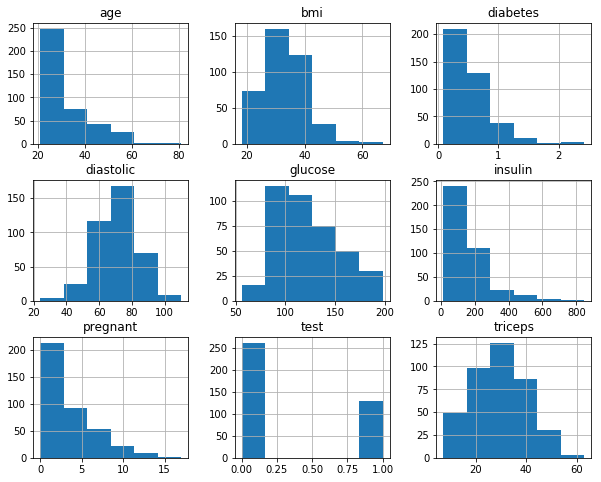

In [7]:
# histogram of the corrected data
bins = (1+np.log(len(data)))
hist = data.hist(figsize=(10,8),bins = int(bins))
plt.show()

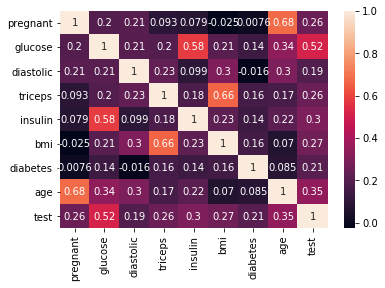

In [8]:
%matplotlib inline
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot = True)

The greater the age or the BMI of a patient is, the greater probabilities are the patient can develop type 2 diabetes.

## Fit a model with the result of the diabetes test as the response and all the other variables as predictors. Can you tell whether this model fits the data? 


One of the most important data transformations we need to apply is the features scaling. Basically most of the machine learning algorithms don't work very well if the features have a different set of values. In our case for example the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason we need to apply a proper transformation.

In [9]:
from sklearn.preprocessing import MinMaxScaler as Scaler

Y = data["test"].copy()
X = data.drop("test", axis=1)

scaler = Scaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
print("SCALED", X_scaled)

mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

SCALED [[ 0.05882353  0.23239437  0.48837209 ...,  0.20245399  0.03511777  0.        ]
 [ 0.          0.57042254  0.18604651 ...,  0.50920245  0.94346895  0.2       ]
 [ 0.17647059  0.15492958  0.30232558 ...,  0.26175869  0.06980728
   0.08333333]
 ..., 
 [ 0.11764706  0.22535211  0.39534884 ...,  0.20858896  0.29164882
   0.01666667]
 [ 0.58823529  0.31690141  0.60465116 ...,  0.3006135   0.03683084  0.7       ]
 [ 0.29411765  0.45774648  0.55813953 ...,  0.16359918  0.06852248  0.15      ]]
Mean: (3, 122)
Standard deviation: (3, 30)


In [11]:
from sklearn import cross_validation, model_selection
model = LogisticRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))

predicted_cross_v = cross_validation.cross_val_predict(model, X_train, Y_train, cv=10)
print("Accuracy for cross validation: %.3f" % accuracy_score(Y_train, predicted_cross_v)) 

scores = model_selection.cross_val_score(model, X_train, Y_train, cv=10)
print(scores)
print('average score: {}'.format(scores.mean()))

Accuracy: 0.759
Accuracy for cross validation: 0.792
[ 0.75        0.78125     0.71875     0.74193548  0.83870968  0.83870968
  0.83870968  0.87096774  0.70967742  0.83870968]
average score: 0.792741935483871



What is the difference in the odds of testing positive for diabetes for a woman with a BMI at the first quartile compared with a woman at the third quartile, if all other factors are held constant?

In [12]:
stats = data['bmi'].describe()

first_quartile = data['bmi'].describe()['25%']
third_quartile = data['bmi'].describe()['75%']

first = data.loc[data['bmi'] < first_quartile]
third = data.loc[data['bmi'] > third_quartile]

odds_first = (first.groupby('test').size())
print("Odds of positive for a women with a BMI at the 1st quartile ", odds_first[1]/len(first))
odds_third = (third.groupby('test').size())
print("Odds of positive for a women with a BMI at the 3rd quartile ", odds_third[1]/len(third))

Odds of positive for a women with a BMI at the 1st quartile  0.134020618557
Odds of positive for a women with a BMI at the 3rd quartile  0.432989690722


## Do women who test positive have higher diastolic blood pressures? 

Mean diastolic blood pressures 68.969466; 70.000000 for a negative case 
Mean diastolic blood pressures 74.076923; 74.000000 for a positive case 


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


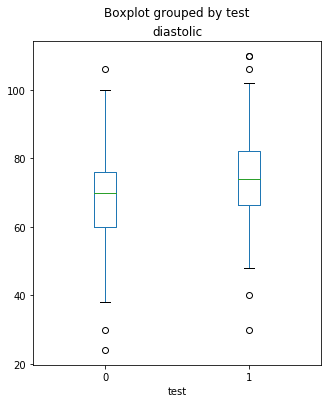

In [13]:
negative = (data.loc[data['test'] == 0].describe()['diastolic'])
positive = (data.loc[data['test'] == 1].describe()['diastolic'])

print("Mean diastolic blood pressures %f; %f for a negative case " % (negative['mean'], negative['50%']))
print("Mean diastolic blood pressures %f; %f for a positive case " % (positive['mean'], positive['50%']))

pressure = data.groupby('test')
boxplot = data.boxplot(column=['diastolic'],by='test', figsize = (5,6),grid=False)
plt.show()

Same prediction on a random data 

In [14]:
print("SCALED", len(data), len(Y))
print(data.describe())



# negative = (data.loc[data['test'] == 0].describe()['diastolic'])
# positive = (data.loc[data['test'] == 1].describe()['diastolic'])

# print("Mean diastolic blood pressures %f; %f for a negative case " % (negative['mean'], negative['50%']))
# print("Mean diastolic blood pressures %f; %f for a positive case " % (positive['mean'], positive['50%']))

# pressure = data.groupby('test')
# boxplot = data.boxplot(column=['diastolic'],by='test', figsize = (5,6),grid=False)
# plt.show()

SCALED 392 392
         pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

         diabetes         age        test  
count  392.000000  392.000000  392.000000  
mean     0.523046   30.864796    0.331633  
std      0.345488   10.200777    0.471401  
min      0.085000   21.000000    0.000000  
25%      0.269750   23.000000    0.

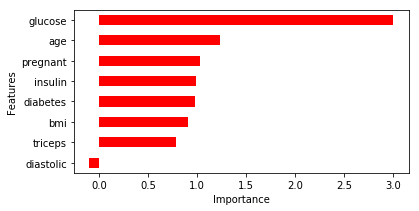

In [15]:
#Importance of the factors for the fitted model 

coeff = list(model.coef_[0])
labels = list(data.drop('test',1).columns)

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(6, 3),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic.


### Predict the outcome for a woman with predictor values
1, 99, 64, 22, 76, 27, 0.25, 25 (same order as in the dataset). Give a confidence interval for your prediction.

For confidence interval estimation:
(Texts in statistical science) Faraway, Julian James-Extending the linear model with R _ generalized linear, mixed effects and nonparametric regression models-Chapman & Hall_CR (attached)

In [16]:
import statsmodels.api as sm

model = sm.Logit(Y_train, X_train).fit_regularized()

new_df = pd.DataFrame([[1, 99, 64, 22, 76, 27, 0.25, 25]])
new_df_scaled = scaler.transform(new_df)
new_df_pred = model.predict(new_df_scaled)
print("Result ", new_df_pred)

cov = model.cov_params()
gradient = (new_df_pred * (1 - new_df_pred) * new_df_scaled.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, new_df_pred + std_errors * c))
lower = np.maximum(0, np.minimum(1, new_df_pred - std_errors * c))

print(upper, lower)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5596784975893524
            Iterations: 64
            Function evaluations: 64
            Gradient evaluations: 64
Result  [ 0.22925999]
[ 0.2939338] [ 0.16458617]


## Use different regressions (binary choice) models and quantify the quality of predictions with different metrics. Which solution is the best?


In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=4)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear",C=0.2)))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=5)))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=5, random_state=3)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 79.2524321557
Naive Bayes: 75.4173067076
K-Nearest Neighbour: 75.1049667179
Decision Tree: 74.7977470558
Support Vector Machine-linear: 77.3425499232
Support Vector Machine-rbf: 78.9349718382
Random Forest: 76.3594470046
